# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [3]:
# Criando dataframe com uma base de dados em .csv
df_sinasc = pd.read_csv('sinasc_RO_2019.csv', sep=',')

In [4]:
df_sinasc.shape

(27028, 69)

In [5]:
# Analisando os dados
df_sinasc[['GESTACAO', 'GRAVIDEZ', 'SEXO', 'APGAR5']]

,GESTACAO,GRAVIDEZ,SEXO,APGAR5
0,37 a 41 semanas,Única,Masculino,10.0
1,37 a 41 semanas,Única,Feminino,9.0
2,37 a 41 semanas,Única,Feminino,10.0
3,37 a 41 semanas,Única,Feminino,10.0
4,37 a 41 semanas,Única,Feminino,10.0
...,...,...,...,...
27023,32 a 36 semanas,Única,Masculino,9.0
27024,37 a 41 semanas,Única,Masculino,9.0
27025,37 a 41 semanas,Única,Masculino,10.0
27026,32 a 36 semanas,Única,Masculino,9.0


In [6]:
df_sinasc['APGAR5'].value_counts()

9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
df_sinasc.loc[df_sinasc['APGAR5'] <= 3, 'APGAR5_FAIXA'] = 'asfixia severa'
df_sinasc.loc[(df_sinasc['APGAR5'] >= 4) & (df_sinasc['APGAR5'] < 6),
           'APGAR5_FAIXA'] = 'asfixia moderada'
df_sinasc.loc[(df_sinasc['APGAR5'] >= 6) & (df_sinasc['APGAR5'] <= 7),
           'APGAR5_FAIXA'] = 'asfixia leve'
df_sinasc.loc[(df_sinasc['APGAR5'] > 7), 'APGAR5_FAIXA'] = 'normal'

In [8]:
df_sinasc[['GESTACAO', 'GRAVIDEZ', 'SEXO', 'APGAR5', 'APGAR5_FAIXA']]

,GESTACAO,GRAVIDEZ,SEXO,APGAR5,APGAR5_FAIXA
0,37 a 41 semanas,Única,Masculino,10.0,normal
1,37 a 41 semanas,Única,Feminino,9.0,normal
2,37 a 41 semanas,Única,Feminino,10.0,normal
3,37 a 41 semanas,Única,Feminino,10.0,normal
4,37 a 41 semanas,Única,Feminino,10.0,normal
...,...,...,...,...,...
27023,32 a 36 semanas,Única,Masculino,9.0,normal
27024,37 a 41 semanas,Única,Masculino,9.0,normal
27025,37 a 41 semanas,Única,Masculino,10.0,normal
27026,32 a 36 semanas,Única,Masculino,9.0,normal


In [9]:
df_sinasc['APGAR5_FAIXA'].value_counts()

normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: APGAR5_FAIXA, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [12]:
# Analisando os dados
df_sinasc_resumo = df_sinasc[['GESTACAO', 'GRAVIDEZ', 'SEXO', 'APGAR5', 'APGAR5_FAIXA']]
df_sinasc_resumo

,GESTACAO,GRAVIDEZ,SEXO,APGAR5,APGAR5_FAIXA
0,37 a 41 semanas,Única,Masculino,10.0,normal
1,37 a 41 semanas,Única,Feminino,9.0,normal
2,37 a 41 semanas,Única,Feminino,10.0,normal
3,37 a 41 semanas,Única,Feminino,10.0,normal
4,37 a 41 semanas,Única,Feminino,10.0,normal
...,...,...,...,...,...
27023,32 a 36 semanas,Única,Masculino,9.0,normal
27024,37 a 41 semanas,Única,Masculino,9.0,normal
27025,37 a 41 semanas,Única,Masculino,10.0,normal
27026,32 a 36 semanas,Única,Masculino,9.0,normal


In [13]:
# Criando novo df filtrando APGAR5 com a categoria = 'normal'
df_faixa_normal = df_sinasc_resumo[df_sinasc_resumo['APGAR5_FAIXA'] == 'normal']
df_faixa_normal

,GESTACAO,GRAVIDEZ,SEXO,APGAR5,APGAR5_FAIXA
0,37 a 41 semanas,Única,Masculino,10.0,normal
1,37 a 41 semanas,Única,Feminino,9.0,normal
2,37 a 41 semanas,Única,Feminino,10.0,normal
3,37 a 41 semanas,Única,Feminino,10.0,normal
4,37 a 41 semanas,Única,Feminino,10.0,normal
...,...,...,...,...,...
27023,32 a 36 semanas,Única,Masculino,9.0,normal
27024,37 a 41 semanas,Única,Masculino,9.0,normal
27025,37 a 41 semanas,Única,Masculino,10.0,normal
27026,32 a 36 semanas,Única,Masculino,9.0,normal


In [14]:
df_faixa_normal[df_faixa_normal['GESTACAO'] == '37 a 41 semanas']

,GESTACAO,GRAVIDEZ,SEXO,APGAR5,APGAR5_FAIXA
0,37 a 41 semanas,Única,Masculino,10.0,normal
1,37 a 41 semanas,Única,Feminino,9.0,normal
2,37 a 41 semanas,Única,Feminino,10.0,normal
3,37 a 41 semanas,Única,Feminino,10.0,normal
4,37 a 41 semanas,Única,Feminino,10.0,normal
...,...,...,...,...,...
27018,37 a 41 semanas,Única,Feminino,8.0,normal
27021,37 a 41 semanas,Única,Feminino,9.0,normal
27024,37 a 41 semanas,Única,Masculino,9.0,normal
27025,37 a 41 semanas,Única,Masculino,10.0,normal


In [15]:
# Validando números sem filtro
df_sinasc_resumo['GESTACAO'].value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

In [16]:
# Nova contagem com filtro
df_faixa_normal['GESTACAO'].value_counts()

37 a 41 semanas        22266
32 a 36 semanas         2134
42 semanas e mais        690
28 a 31 semanas          129
22 a 27 semanas           51
Menos de 22 semanas        4
Name: GESTACAO, dtype: int64

<IPython.core.display.Javascript object>


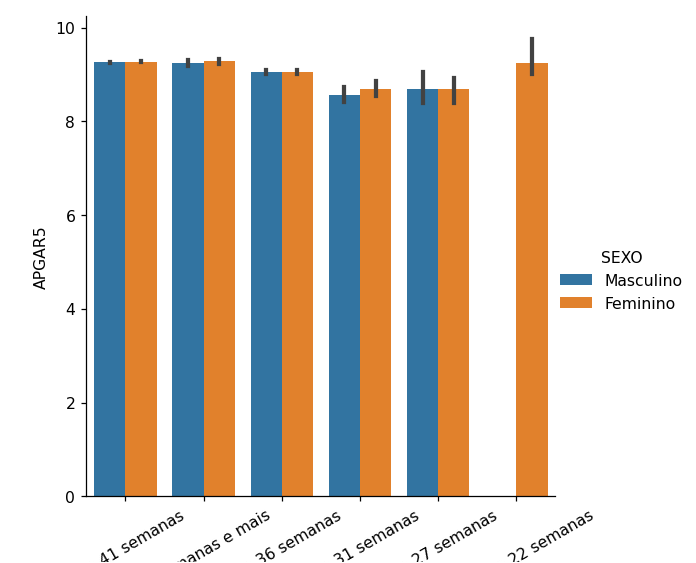

In [17]:
sns.catplot(x='GESTACAO', 
            y='APGAR5', 
            hue='SEXO',
            kind='bar',
            data=df_faixa_normal
           )
plt.xticks(rotation=30);

In [18]:
# Testando outra opção para aplicar um filtro no df
filtro = df_sinasc['APGAR5_FAIXA'] == 'normal'
resultado = df_sinasc.loc[filtro, ['GESTACAO', 'GRAVIDEZ', 'SEXO', 'APGAR5', 'APGAR5_FAIXA']]
resultado

,GESTACAO,GRAVIDEZ,SEXO,APGAR5,APGAR5_FAIXA
0,37 a 41 semanas,Única,Masculino,10.0,normal
1,37 a 41 semanas,Única,Feminino,9.0,normal
2,37 a 41 semanas,Única,Feminino,10.0,normal
3,37 a 41 semanas,Única,Feminino,10.0,normal
4,37 a 41 semanas,Única,Feminino,10.0,normal
...,...,...,...,...,...
27023,32 a 36 semanas,Única,Masculino,9.0,normal
27024,37 a 41 semanas,Única,Masculino,9.0,normal
27025,37 a 41 semanas,Única,Masculino,10.0,normal
27026,32 a 36 semanas,Única,Masculino,9.0,normal


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [19]:
tab_cruzada = pd.crosstab(df_sinasc['APGAR5'], df_sinasc['GESTACAO'])
tab_cruzada

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,2,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,45,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [20]:
pct_lin = tab_cruzada.div(tab_cruzada.sum(axis = 1), axis = 0)
pct_lin

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1.0,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2.0,0.500000,0.125000,0.125000,0.187500,0.000000,0.062500
3.0,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4.0,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5.0,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6.0,0.027778,0.097222,0.236111,0.625000,0.013889,0.000000
7.0,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8.0,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<IPython.core.display.Javascript object>


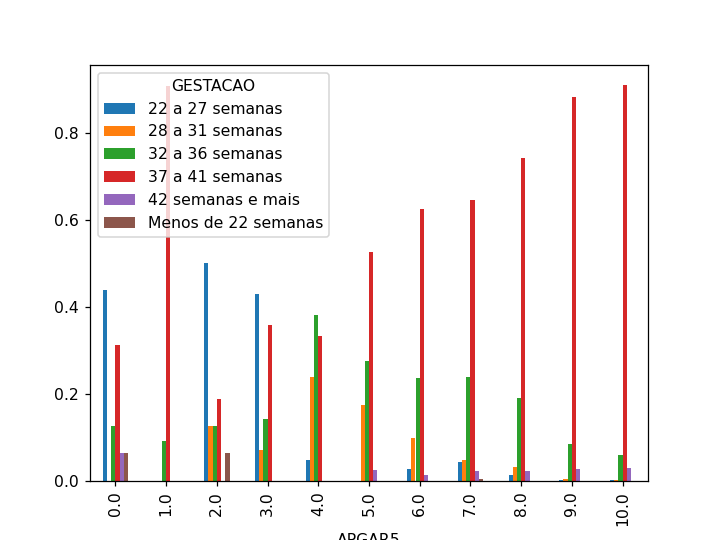

In [21]:
pct_lin.plot.bar();

De acordo com o a tabela de percentual APGAR5 x GESTACAO e visualização do gráfico, os dados confirmam a afirmação e classificação dos médicos, pois temos as melhores notas da variável APGAR5 para crianças com gestão de 37 a 41 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [22]:
# Analisando os dados
df_sinasc['PESO'].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 3300    188
3500    177
3250    173
3000    169
3350    166
       ... 
2932      1
2222      1
465       1
3353      1
2352      1
Name: PESO, Length: 1476, dtype: int64>

In [23]:
# Analisando os dados
df_sinasc[['APGAR5', 'PESO']].head(20).sort_values(by='APGAR5')

,APGAR5,PESO
14,7.0,2550
1,9.0,3055
13,9.0,2995
12,9.0,2950
8,9.0,3570
10,9.0,3590
0,10.0,3685
17,10.0,3520
16,10.0,4090
15,10.0,3690


In [24]:
# Analisando os dados
tab_cruzada_dois = pd.crosstab(df_sinasc['APGAR5'], df_sinasc['PESO'] > 2500)
tab_cruzada_dois

PESO,False,True
APGAR5,,
0.0,11,6
1.0,7,17
2.0,14,4
3.0,9,6
4.0,14,9
5.0,19,26
6.0,24,55
7.0,76,165
8.0,382,1612


In [25]:
tab_cruzada_dois = tab_cruzada_dois.rename(columns={False: 'abaixo do peso', True: 'peso normal'})
tab_cruzada_dois

PESO,abaixo do peso,peso normal
APGAR5,,
0.0,11,6
1.0,7,17
2.0,14,4
3.0,9,6
4.0,14,9
5.0,19,26
6.0,24,55
7.0,76,165
8.0,382,1612


De acordo com algumas consultas externas, entendi que o peso de um recem nascido é considerado abaixo do peso para valores abaixo de 2.5 kg.
E na análise acima foi identificado que APGAR5 tem relação com o peso

<IPython.core.display.Javascript object>


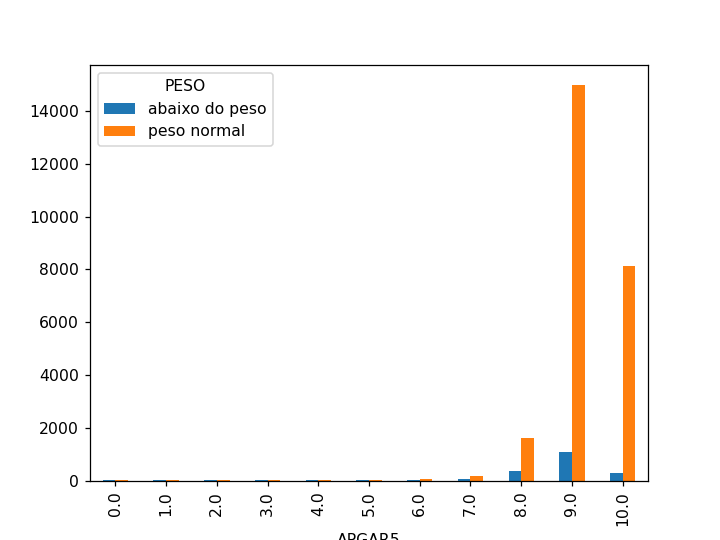

In [28]:
tab_cruzada_dois.plot.bar();